In this exercise we'll take a look at some (simulated) proton-proton collision data.  The events chosen all have at least two reconstructed muons.  If you're not familiar, a muon is a heavy cousin of the electron; see [here](https://en.wikipedia.org/wiki/Muon) and [here](https://pdg.lbl.gov/2020/tables/rpp2020-sum-leptons.pdf) for some more information.  Some of these events contain (at least) a pair of real muons with opposite electric charge frmo the decay of a Z boson (see [here](https://en.wikipedia.org/wiki/W_and_Z_bosons),[here](https://pdg.lbl.gov/2020/listings/rpp2020-list-z-boson.pdf)).  Other events contain one real muon (could have positive or negative charge) from the decay of a W boson (more [here](https://pdg.lbl.gov/2020/listings/rpp2020-list-w-boson.pdf)) and one or more "fake" muons of either electric charge.  Here, fake means a lepton that is not from the decay of a W or Z boson.  These are typically from semi-leptonic decays of charm or bottom hadrons or decays in flight of kaons.

Take a look at the data in the file *total_withouttruth_mod.csv*.  Each row contains 8 values, separated by commas, containing the following information:

column 0: arbitrary index <br>
column 1: event number <br>
column 2: muon index in that event <br>
column 3: x-component of muon momentum <br>
column 4: y-component of muon momentum <br>
column 5: z-component of muon momentum <br>
column 6: muon energy <br>
column 7: muon electric charge <br>

Read in the data, organizing muons by event.  Plot a histogram of the invariant mass of all possible pairs of muons in each event, i.e. you may have more than one entry per event.  Play around and choose reasonable binning and comment on your observations.  Then, split the muon pairs into two samples, one where the muons have opposite electric charge and one where the muons have the same electric charge.  Plot histograms of the two populations and comment on your observations.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from os import getcwd

**Read data from CSV file using pandas.  How many events are there?  How many muons are there?**

In [2]:
## read muon data from csv file into a list, with an entry (list) for each event containing np.array with the muon 4-vector components
data = pd.read_csv(getcwd()+'/total_withouttruth_mod.csv')
data.head()

,Unnamed: 0,ievent,imuon,Muon_px,Muon_py,Muon_pz,Muon_energy,Muon_charge
0,0,0,1,19.239374,-1.831505,79.995447,82.296966,-1
1,1,0,0,-29.019003,8.491118,-7.981010,31.271541,1
2,2,1,1,-13.275436,2.828894,-5.590037,14.679902,1
3,3,1,0,-13.828352,2.826926,-5.669556,15.210847,1
4,4,2,1,-8.933261,-4.019846,-18.555020,20.982427,1


In [3]:
data = data.drop(columns=data.columns[0]) ## drop first column which is an arbitrary index
data.head()

,ievent,imuon,Muon_px,Muon_py,Muon_pz,Muon_energy,Muon_charge
0,0,1,19.239374,-1.831505,79.995447,82.296966,-1
1,0,0,-29.019003,8.491118,-7.981010,31.271541,1
2,1,1,-13.275436,2.828894,-5.590037,14.679902,1
3,1,0,-13.828352,2.826926,-5.669556,15.210847,1
4,2,1,-8.933261,-4.019846,-18.555020,20.982427,1


In [4]:
print('There are %d events.' % (len(data.groupby('ievent'))))
print('There are %d muons.' % (len(data.index)))

There are 83778 events.
There are 176392 muons.


**Make histograms of each component of the muon momentum, the muon energy, and the number of muons per event.  You should choose a reasonable binning and range and label the axes. You may want to increase the width of the figure using the argument figsize=(x,y).**

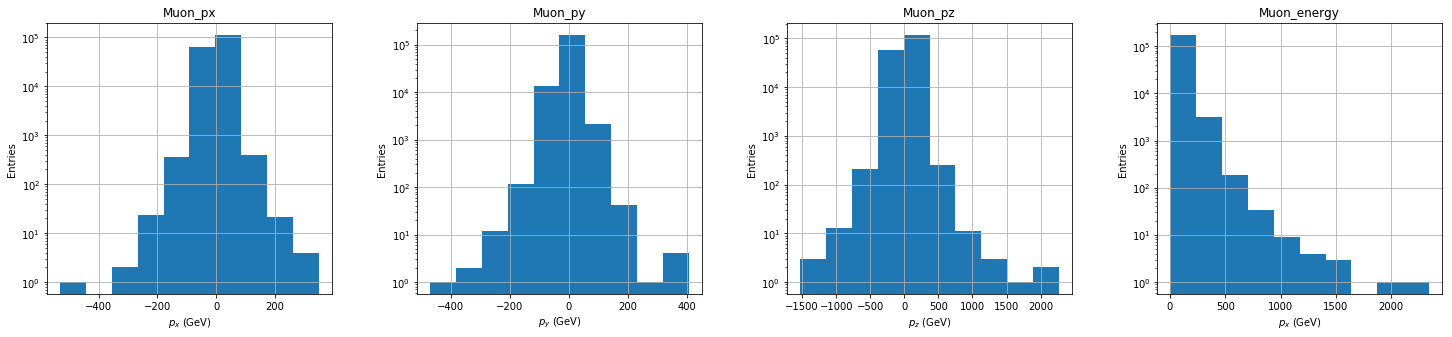

In [5]:
## create 4 subplots and make the figure wider
fig,axs = plt.subplots(1,4,figsize=(25,5))

## plot x-component of momentum for all muons
data.hist(column='Muon_px',ax=axs[0])
axs[0].set_xlabel('$p_x$ (GeV)')
axs[0].set_ylabel('Entries')
axs[0].set_yscale('log')

## plot y-component of momentum for all muons
data.hist(column='Muon_py',ax=axs[1])
axs[1].set_xlabel('$p_y$ (GeV)')
axs[1].set_ylabel('Entries')
axs[1].set_yscale('log')

## plot z-component of momentum for all muons
data.hist(column='Muon_pz',ax=axs[2])
axs[2].set_xlabel('$p_z$ (GeV)')
axs[2].set_ylabel('Entries')
axs[2].set_yscale('log')

## plot energy for all muons
data.hist(column='Muon_energy',ax=axs[3])
axs[3].set_xlabel('$p_x$ (GeV)')
axs[3].set_ylabel('Entries')
axs[3].set_yscale('log')

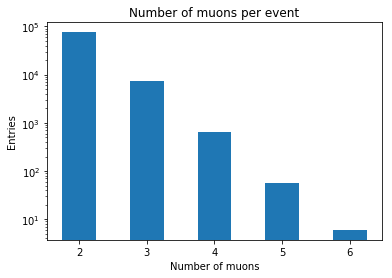

In [6]:
fig,ax=plt.subplots()
nmuons = data.groupby("ievent")["imuon"].count()
ax.hist(nmuons,bins=np.arange(np.amin(nmuons),np.amax(nmuons)+2)-0.5,rwidth=0.5)
ax.set_xlabel('Number of muons')
ax.set_ylabel('Entries')
ax.set_title('Number of muons per event')
ax.set_yscale('log')

**Create all possible pairs of muons for each event and store them in a list called <u>dimuons</u>.  Again, the list should have one entry per event.  Each entry should be a list of numpy arrays with each numpy array representing a 4-vector [px,py,pz,E].  How many dimuon pairs are there?  Make a histogram of each component of the momentum and the energy for each dimuon pair and a histogram of the number of dimuon pairs per event.**

In [9]:
# group by the event number into a bunch of short dataframes
# each with just the muons in that event
for ievent,df in data.groupby("ievent"):
    if df['imuon'].count() <= 2 : continue
    if ievent > 100: break
    print(df)
    
df

    ievent  imuon    Muon_px    Muon_py    Muon_pz  Muon_energy  Muon_charge
48      24      2   0.152347  -3.247994 -12.574731    12.988753            1
49      24      0 -18.175345 -12.554414 -24.611514    33.071049           -1
50      24      1 -10.238924  -1.124277 -24.394363    26.480100            1
     ievent  imuon    Muon_px    Muon_py    Muon_pz  Muon_energy  Muon_charge
125      62      1  -5.225469  -1.540086  -5.251772     7.567672            1
126      62      2   1.127324  -3.539438  -1.533002     4.019919            1
127      62      0  84.735615  19.623171 -44.702228    97.793117            1
     ievent  imuon   Muon_px    Muon_py    Muon_pz  Muon_energy  Muon_charge
132      65      2  3.219164   0.488619   2.065808     3.857526           -1
133      65      0 -8.978988 -10.092965 -66.348191    67.709555           -1
134      65      1  4.349806  -0.696266  -7.831448     8.986009            1
     ievent  imuon   Muon_px   Muon_py   Muon_pz  Muon_energy  Muon_char

,ievent,imuon,Muon_px,Muon_py,Muon_pz,Muon_energy,Muon_charge
217,105,2,-1.702265,5.259903,-1.686644,5.781022,-1
218,105,1,9.364015,16.088778,18.339382,26.131928,1
219,105,0,15.936760,23.597799,27.287174,39.439035,1


In [ ]:
#events = data.groupby(['ievent','imuon'],as_index=False)
events = data
events['Muon'] = np.array([events.Muon_px,events.Muon_py,events.Muon_pz,events.Muon_energy,events.Muon_charge])
events.head()
#events2 = events.groupby(['ievent'])
#for event,frame in events2:
#    print(frame.head(),'\n\n')

In [ ]:
from itertools import combinations


In [ ]:
## create all possible pairs of muons for each event
dimuons = []
for index,lom in enumerate(muons):
    if index == len(dimuons): dimuons.append([])
    for idx,i in enumerate(lom[:-1]):
        for j in lom[idx+1:]:
            dimuons[index].append(i+j)

**Calculate the invariant mass for each dimuon pair.  Recall the relation $E^2 = p^2c^2 + m^2c^4$.  Here value are in a unit system where c=1.  Make a histogram of dimuon invariant mass.  Play around a bit to find a suitable binning.  What do you observe?**

In [ ]:
## calculate the invariant mass of the muon pairs
def get_mass(i):
    return np.sqrt(i[-1]*i[-1]-np.sum(i[:-1]*i[:-1]))

dimumass = []
for lod in dimuons:
    for x in lod:
        m = get_mass(x)
        dimumass.append(m)

In [ ]:
## make a histogram of the dimuon invariant mass
fig,ax=plt.subplots()
vals,bins,patches=ax.hist(dimumass,bins=20,rwidth=0.75)
ax.set_xlabel('Dimuon mass (GeV)')
ax.set_ylabel('Entries')
ax.set_title('Mass of dimuon candidates')
ax.set_yscale('log')

In [ ]:
## let's try with a different binning focused more on the lower mass values where most of the entries are
fig,ax=plt.subplots()

vals,bins,patches=ax.hist(dimumass,bins=np.linspace(0,200,41),rwidth=0.75)
ax.set_xlabel('Dimuon mass (GeV)')
ax.set_ylabel('Entries')
ax.set_title('Mass of dimuon candidates')
ax.set_yscale('log')

**Do you see any peaks? If so around what mass value(s)? What are you observering?**

**Now separate the dimuon candidates into two samples, those with the same electric charge and those with opposite electric charge. How many pairs of each type do you get? Plot the invariant mass for dimuon pairs for the two samples.  What do you see?**

In [ ]:
## read muon data from csv file into a list, with an entry (list) for each event containing np.array with the muon 4-vector components
muons = []
with open('total_withouttruth_mod.csv') as csv_file:
    csv_reader = csv.reader(csv_file,delimiter=',')
    for index,row in enumerate(csv_reader):
        if index==0: continue
        nrow,nevt,nmu,px,py,pz,E,charge=convert_row(row)
        if nevt == len(muons): muons.append([])
        muons[nevt].append(np.array([px,py,pz,E,charge]))
        
csv_file.close()

In [ ]:
## create all possible pairs of muons for each event, separately for those with the same and opposite electric charge
dimuons=[]
for index,lom in enumerate(muons):
    if index == len(dimuons): dimuons.append([])
    for idx,i in enumerate(lom[:-1]):
        for j in lom[idx+1:]:
            dimuons[index].append(i+j)
            
dimuons_same_charge = [x for event in dimuons for x in event if x[4]!=0 ]
dimuons_opposite_charge = [x for event in dimuons for x in event if x[4]==0]
print('Found %d pairs of muons with the same electric charge.' % (len(dimuons_same_charge)))
print('Found %d pairs of muons with the opposite electric charge.' % (len(dimuons_opposite_charge)))

In [ ]:
## calculate the invariant mass of the muon pairs
def get_mass(i):
    return np.sqrt(i[-2]*i[-2]-np.sum(i[:-2]*i[:-2]))

dimumass_same_charge = []
for dimu in dimuons_same_charge:
    m = get_mass(dimu)
    dimumass_same_charge.append(m)
        
dimumass_opposite_charge = []
for dimu in dimuons_opposite_charge:
    m = get_mass(dimu)
    dimumass_opposite_charge.append(m)

In [ ]:
## make a histogram of the dimuon invariant mass
fig,axs=plt.subplots(1,2,figsize=(12.5,5))

## dimuon pairs with same electric charge
vals0,bins0,patches0=axs[0].hist(dimumass_same_charge,bins=20,rwidth=0.75)
axs[0].set_xlabel('Dimuon mass (GeV)')
axs[0].set_ylabel('Entries')
axs[0].set_title('Mass of dimuon candidates with same electric charge')
axs[0].set_yscale('log')

## dimuon pairs with opposite electric charge
vals1,bins1,patches1=axs[1].hist(dimumass_opposite_charge,bins=20,rwidth=0.75)
axs[1].set_xlabel('Dimuon mass (GeV)')
axs[1].set_ylabel('Entries')
axs[1].set_title('Mass of dimuon candidates with opposite electric charge')
axs[1].set_yscale('log')

In [ ]:
## make a histogram of the dimuon invariant mass zooming in on region below 200 GeV
fig,axs=plt.subplots(1,2,figsize=(12.5,5))
bins=np.linspace(0,200,41)

## dimuon pairs with same electric charge
vals0,bins0,patches0=axs[0].hist(dimumass_same_charge,bins=bins,rwidth=0.75)
axs[0].set_xlabel('Dimuon mass (GeV)')
axs[0].set_ylabel('Entries')
axs[0].set_title('Mass of dimuon candidates with same electric charge')
axs[0].set_yscale('log')

## dimuon pairs with opposite electric charge
vals1,bins1,patches1=axs[1].hist(dimumass_opposite_charge,bins=bins,rwidth=0.75)
axs[1].set_xlabel('Dimuon mass (GeV)')
axs[1].set_ylabel('Entries')
axs[1].set_title('Mass of dimuon candidates with opposite electric charge')
axs[1].set_yscale('log')